In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('statistical_results.csv', sep=';', header=1)

# Unscaled

In [12]:
df.head()

,dataset_name,num_instances,num_features,num_classes,label_skew,num_missing_values,perc_missing_values,num_duplicate_instances,perc_duplicate_instances,avg_autocorrelation,avg_adf,avg_pvalue
0,ACSF1_TEST,99,1460,10,0.008108,0,0.0,0,0.0,0.378368,-3.984327,6.774993e-02
1,ACSF1_TRAIN,99,1460,10,0.008108,0,0.0,0,0.0,0.272849,-3.993823,6.644648e-02
2,Adiac_TEST,390,176,37,0.076197,0,0.0,0,0.0,0.004275,-16.675496,2.170382e-07
3,Adiac_TRAIN,389,176,37,-0.070332,0,0.0,0,0.0,-0.010447,-18.041288,8.347768e-08
4,AllGestureWiimoteX_TEST,699,500,10,-0.001212,0,0.0,0,0.0,0.022386,-13.031480,3.636622e-03


In [13]:
df.describe()

,num_instances,num_features,num_classes,label_skew,num_missing_values,perc_missing_values,num_duplicate_instances,perc_duplicate_instances,avg_autocorrelation,avg_adf,avg_pvalue
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,2.380000e+02,2.380000e+02
mean,745.710938,534.539062,8.730469,-0.045133,6430.398438,2.926922,15.355469,0.445541,0.143527,-1.852019e+11,6.268895e-02
std,1637.593699,561.942093,12.002026,0.442763,51363.481871,13.326223,174.630014,2.385135,0.231283,1.814970e+12,1.111742e-01
min,15.000000,15.000000,2.000000,-2.721490,0.000000,0.000000,0.000000,0.000000,-0.350910,-2.216334e+13,0.000000e+00
25%,99.000000,144.000000,2.000000,-0.102493,0.000000,0.000000,0.000000,0.000000,-0.005185,-1.662975e+01,9.753262e-07
50%,257.500000,344.000000,4.000000,-0.004909,0.000000,0.000000,0.000000,0.000000,0.031445,-8.257114e+00,5.499008e-03
75%,599.000000,657.750000,10.000000,0.025127,0.000000,0.000000,0.000000,0.000000,0.276288,-4.612848e+00,8.022364e-02
max,16799.000000,2844.000000,60.000000,1.823910,547026.000000,75.935334,2703.000000,19.553073,0.986557,-1.539229e+00,5.138007e-01


## Correlation Matrix

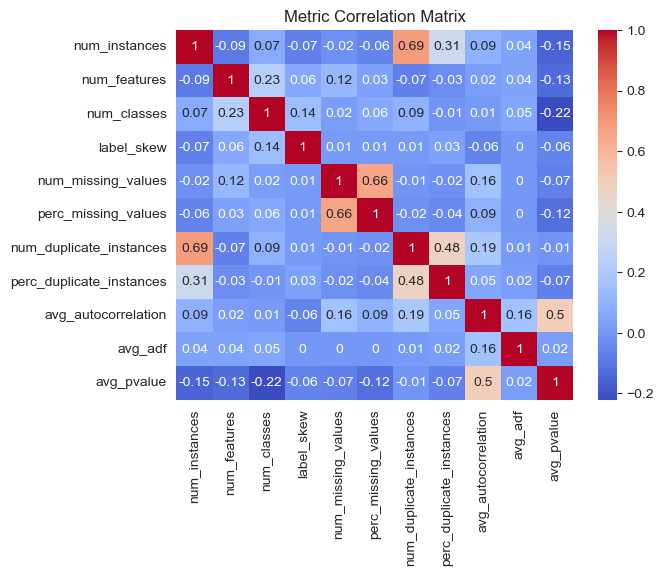

Count of values in each category:
-1 to -0.5: 0
-0.49 to -0.01: 40
0: 6
0.01 to 0.49: 58
0.5 to 1: 17
Total Sum: 121


In [66]:
correlation_matrix = df.corr().round(2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Metric Correlation Matrix')
plt.show()

# Count of values for each category
count_neg_1_to_neg_0_5 = ((correlation_matrix >= -1) & (correlation_matrix <= -0.5)).sum().sum()
count_neg_0_49_to_neg_0_01 = ((correlation_matrix >= -0.49) & (correlation_matrix <= -0.01)).sum().sum()
count_0 = ((correlation_matrix > -0.01) & (correlation_matrix < 0.01)).sum().sum()
count_0_01_to_0_49 = ((correlation_matrix >= 0.01) & (correlation_matrix <= 0.49)).sum().sum()
count_0_5_to_1 = ((correlation_matrix >= 0.5) & (correlation_matrix <= 1)).sum().sum()

# Total sum of counts
total_count = count_neg_1_to_neg_0_5 + count_neg_0_49_to_neg_0_01 + count_0 + count_0_01_to_0_49 + count_0_5_to_1

# Print the counts
print("Count of values in each category:")
print("-1 to -0.5: {}".format(count_neg_1_to_neg_0_5))
print("-0.49 to -0.01: {}".format(count_neg_0_49_to_neg_0_01))
print("0: {}".format(count_0))
print("0.01 to 0.49: {}".format(count_0_01_to_0_49))
print("0.5 to 1: {}".format(count_0_5_to_1))

# Print the total sum
print("Total Sum: {}".format(total_count))

## Histograms

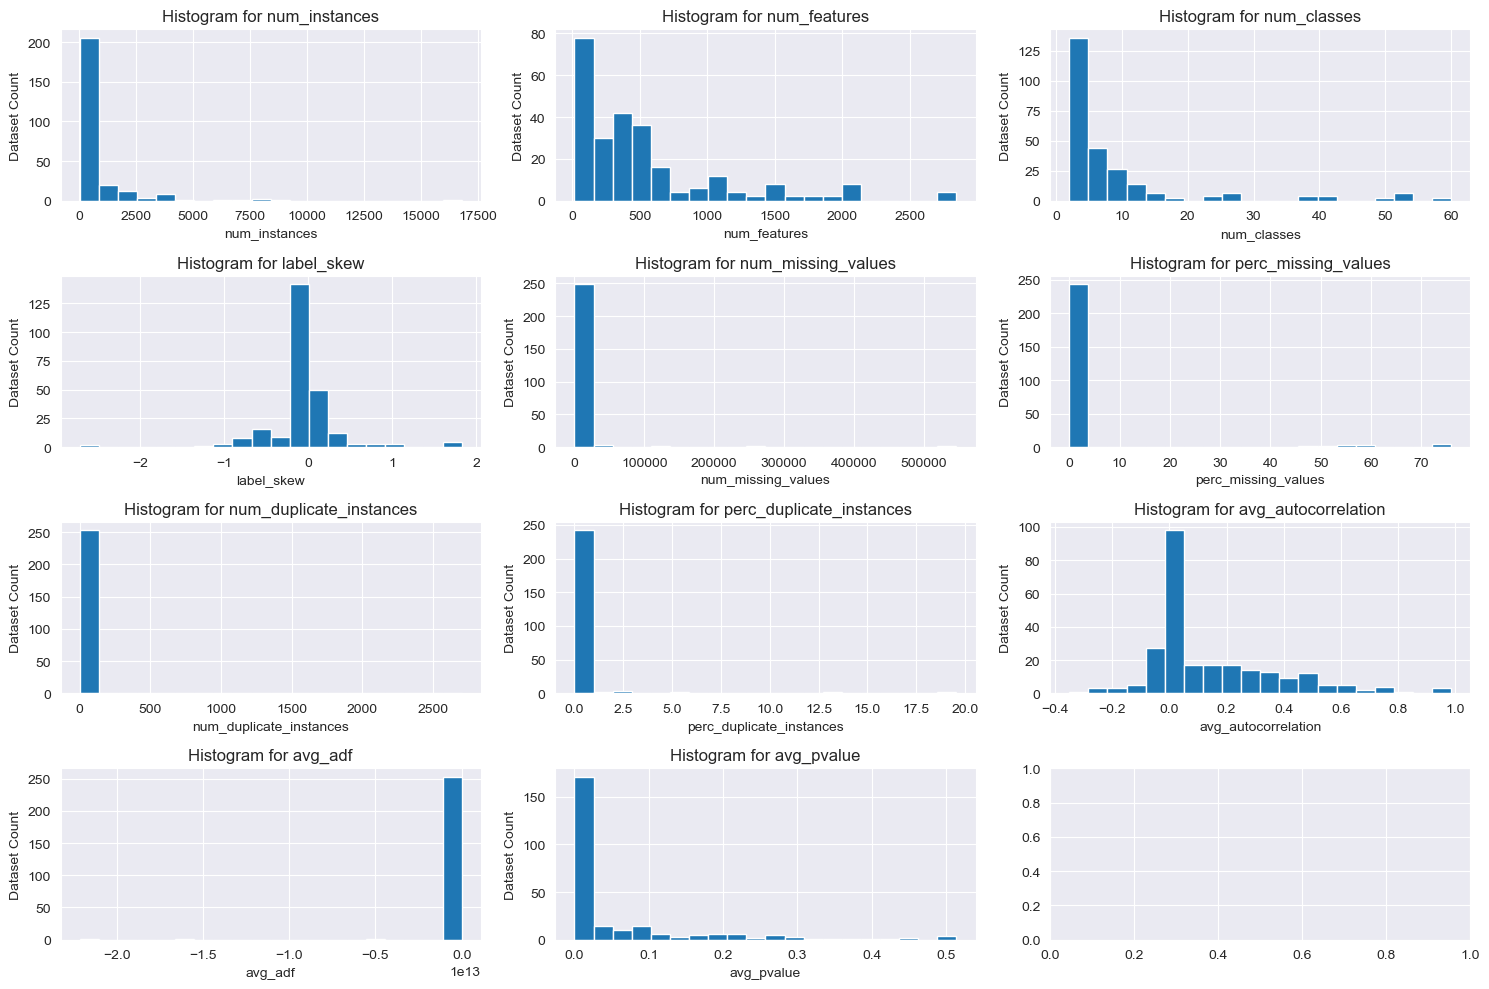

In [36]:
feature_columns = ['num_instances', 'num_features', 'num_classes', 'label_skew', 'num_missing_values', 'perc_missing_values', 'num_duplicate_instances', 'perc_duplicate_instances', 'avg_autocorrelation', 'avg_adf', 'avg_pvalue']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for selected columns
for i, column in enumerate(feature_columns):
    df[column].hist(bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Dataset Count')

# Adjust layout
plt.tight_layout()
plt.show()

## Scatter Plots

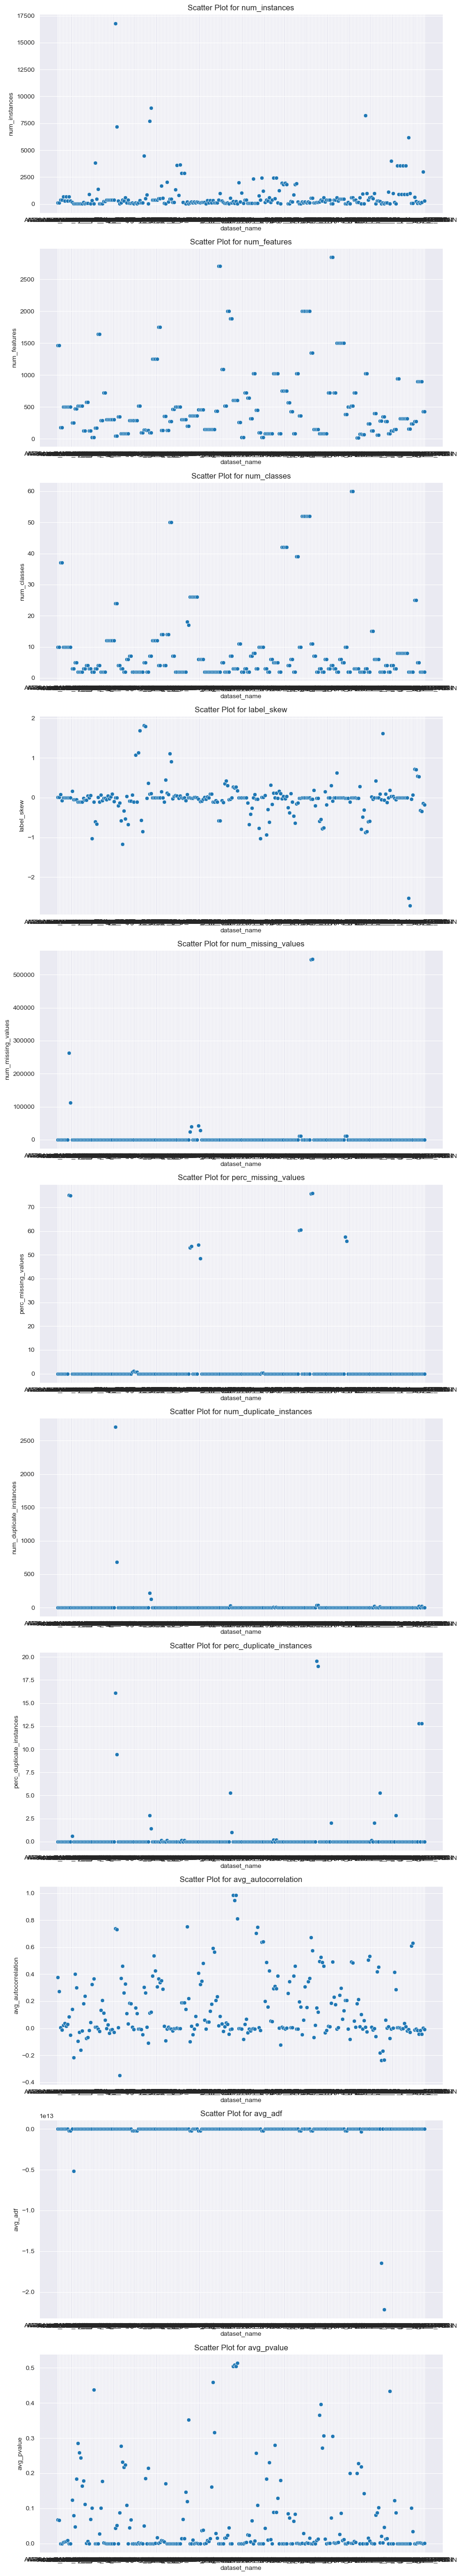

In [44]:
# Set up subplots
num_plots = len(feature_columns)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 5*num_plots), sharex=False)

# Plot scatter plot for each feature column
for i, feature_col in enumerate(feature_columns):
    sns.scatterplot(x='dataset_name', y=feature_col, data=df, ax=axes[i])
    axes[i].set_title(f'Scatter Plot for {feature_col}')
    axes[i].set_ylabel(feature_col)

plt.tight_layout()
plt.show()